## 1. Import Libraries

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LinReg
from sklearn import metrics
from scipy.stats import uniform
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pl

import pylab as p


In [34]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (16.,10.)})
sns.set_style("whitegrid")

## 2. Import Data

In [3]:
train = pd.read_csv("../Data/cleaning_train.csv")

In [4]:
train.head()

,id,carat,cut,color,clarity,depth,table,price
0,0,1.14,2,4,3,61.0,56.0,9013
1,1,0.76,2,5,5,62.7,57.0,2692
2,2,0.84,2,4,4,61.4,56.0,4372
3,3,1.55,2,5,4,62.0,57.0,13665
4,4,0.30,2,4,7,61.9,57.0,422


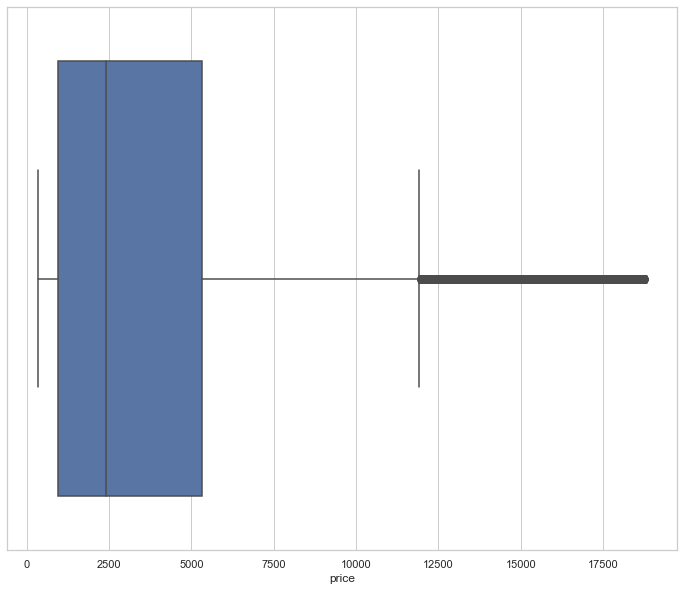

In [23]:
sns.boxplot(x="price",data=train);

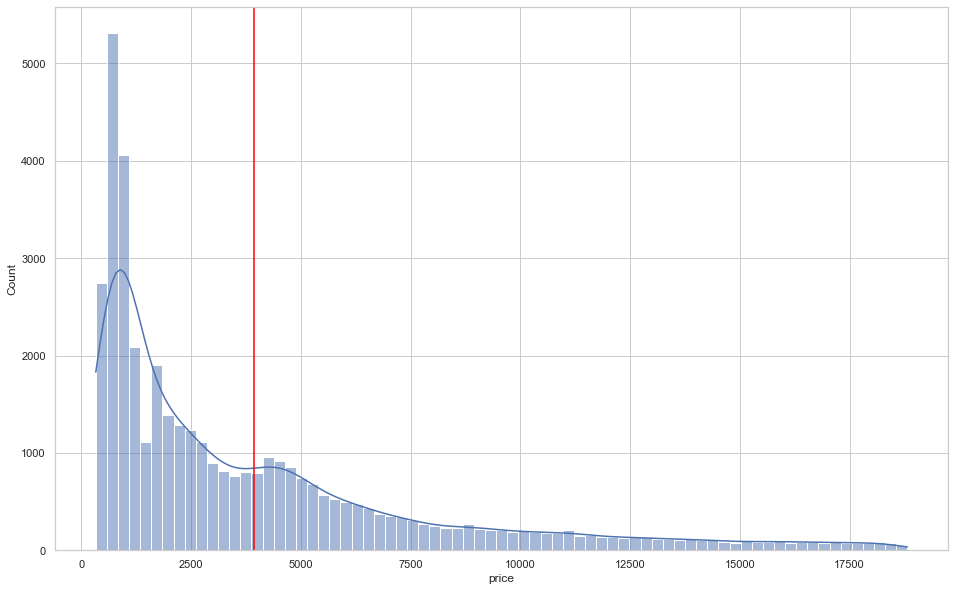

In [35]:
fig = sns.histplot(x=train.price, data=train, kde=True)
fig.axvline(x=train.price.mean(), color="red", label="media");

## 3. Model

In [5]:
X = train.drop(columns=['id','price'])
X.head()

,carat,cut,color,clarity,depth,table
0,1.14,2,4,3,61.0,56.0
1,0.76,2,5,5,62.7,57.0
2,0.84,2,4,4,61.4,56.0
3,1.55,2,5,4,62.0,57.0
4,0.30,2,4,7,61.9,57.0


In [6]:
y = train.price
y.head()

0     9013
1     2692
2     4372
3    13665
4      422
Name: price, dtype: int64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [8]:
lin = LinReg()

In [9]:
lin.fit(X_train,y_train)

LinearRegression()

In [11]:
y_pred = lin.predict(X_test)

In [15]:
y_pred.shape

(8091,)

In [13]:
lin.coef_ 

array([8811.79004624, -115.50122118, -323.74902271, -527.56747067,
        -51.70343605,  -50.71917139])

In [14]:
lin.intercept_

7039.699213442545

In [17]:
print('MAE - Error Medio Absoluto', metrics.mean_absolute_error(y_test, y_pred))
print('MSE - Error Cuadratico Medio', metrics.mean_squared_error(y_test, y_pred))
print('RMSE - Raiz Error Cuadratico Medio', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 - Coeficiente de Determinacion', metrics.r2_score(y_test, y_pred))

MAE - Error Medio Absoluto 874.5469341580467
MSE - Error Cuadratico Medio 1602999.4435456214
RMSE - Raiz Error Cuadratico Medio 1266.096143089308
R2 - Coeficiente de Determinacion 0.9024967655120297


In [36]:
parameters = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [37]:
params = {
     'n_estimators': [400, 600,800]
}

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [40]:
rfc = RandomForestClassifier()

In [41]:
grid = GridSearchCV(rfc, params, verbose=1)

In [ ]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/Caskroom/miniconda/base/envs/Ironhack/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
